# Setup

## Imports

In [1]:
import os
import numpy as np
import pandas as pd
import plotly.express as px
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Files

In [2]:
map_file = "gz_2010_us_040_00_5m.json" #source : https://eric.clst.org/tech/usgeojson/, I used US states 5m
external_data = pd.read_csv("./data/2_clean/external_data.csv")
fires = pd.read_csv("./data/2_clean/fires.csv")
external_data["Date"] = pd.to_datetime(external_data["Date"])
fires.DISCOVERY_TIME = pd.to_datetime(fires.DISCOVERY_TIME)
sample = external_data.sample(n=int(1e5))

# Goal

The goal of this notebook is to visualy explore the data and plot relevant graphs to help you build insights on the business problem.
Here is a list of various questions you can try to answer in this notebook (feel free to check them as you go, but you don't have to do them all, they are just guidelines) :
- [ ] What are the names of the top 5 biggest fires in the data available?
- [ ] Is there an evolution of temperatures and precipitation over the available years?
- [ ] Are there different frequency or size of fires between states?
- [ ] Are there differences in any nature between the different causes of fires? 

Any visualisation you deem interesting is worth trying, as long as you don't take the whole hands-on for a single one. You can use classic plots, map plots or animated points to help you build insights on how we can solve the problem and build meaningful features for our models.

Do not hesitate to write some analysis with your graphs.

### Dependencies with previous Labs

This lab uses datasets from previous Labs:
- a cleaned dataset with all fires observed between 2011 and 2014 in the US `./data/2_clean/fires.csv`
- a cleaned dataset with external data (demographics, temperature and precipitation) `./data/2_clean/external_data.csv`

You can either:
- [preferred option] start over from the work that you produced
- or take pre-processed datasets located in `./data/9_helper_datasets`. In that case:
    - `./data/9_helper_datasets/external_data.csv` should be **copied** (not deleted) to `./data/2_clean/external_data.csv`
    - `./data/9_helper_datasets/fires.csv` should be **copied** (not deleted) to `./data/2_clean/fires.csv`

### Helper functions
Feel free to use them to help you build graphs without too much complexity
Don't limit yourselves to just these however, you can experiment with pandas, matplotlib, plotly or seaborn as well.

In [21]:
def plot_per_year(df:pd.DataFrame, year_col:str, col:str, title:str)->None:
    '''
    Plot a categorical column by year in a stacked bar fashion (e.g. the repartition of fire causes per year)
    
    Input:
    df (pd.DataFrame) : Input data
    col (str) : Column from the dataframe to be used for plot, must be categorical type
    year_col (str) : Column from the dataframe to be used for time indication
    title (str) : Title of the graph
    
    Output:
    None : it just shows the graph
    '''
    #################
    # TO BE FILLED  #
    #################

def plot_by_hour(df:pd.DataFrame, col:str)->None:
    '''
    Plot a categorical column by hour accross the different years in a vertical bar fashion 
    (one bar representing one hour accross the whole year e.g. the average fire size per hour)
    
    Input:
    df (pd.DataFrame) : Input data with col named "year"
    col (str) : Column from the dataframe to be used for plot, must be categorical type
    
    Output:
    None : it just shows the graph
    '''
    #################
    # TO BE FILLED  #
    #################


# Data Visualization

### Benford's law

<AxesSubplot:title={'center':'Distribution of first digits of fire sizes'}>

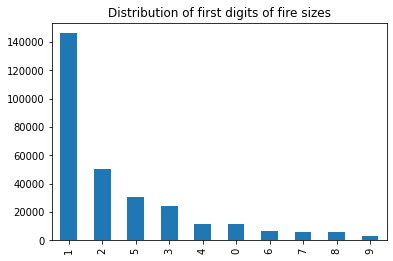

In [10]:
# Check Benford's law to check for fraud in the data: https://en.wikipedia.org/wiki/Benford%27s_law


### Get the US map with state delimitation

In [11]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
NA = world[world.continent=="North America"]
USA = NA[NA.iso_a3 =="USA"]

In [12]:
# Rework the boundaries to remove Alaska and have a clearer view of the main part of the USA
array = np.array([-130,22,-66,60])

In [13]:
# TODO se baser sur les fichiers contenus dans './data/3_merge/xxx'
# TODO à mettre dans un pipeline.py ou utils.py

def animate_map(col:str, time_col:str, df:pd.DataFrame)->None:
    '''
    Animate a map over time of a numerical feature from the dataframe
    
    Input:
    df (pd.DataFrame) : Input data with Lat, Lon
    col (str) : Name of the column from the dataframe to be used for plot
    time_col (str) : Name of the column representing timestamps to be used (Years is best)
    
    Output:
    None : it just shows the graph
    '''
    fig = px.scatter_mapbox(df,
              lat="Lat" ,
              lon="Lon",
              hover_name=col,
              color=col,
              animation_frame=time_col,
              mapbox_style='carto-positron',
              category_orders={
              time_col:list(np.sort(df[time_col].unique()))
              },                  
              zoom=2,
              range_color=[-20,150])
    fig.show();

def animate_curve(x:str,y:str, time_col:str, df:pd.DataFrame)->None:
    '''
    Animate a scatter plot over time of a numerical feature from the dataframe
    
    Input:
    df (pd.DataFrame) : Input data with Lat, Lon
    col (str) : Name of the column from the dataframe to be used for plot
    time_col (str) : Name of the column representing timestamps to be used (Years is best)
    
    Output:
    None : it just shows the graph
    '''
    fig = px.scatter(df,
              x=x ,
              y=y,
              animation_frame=time_col,
              category_orders={
              time_col:list(np.sort(df[time_col].unique()))
              },)
    fig.show();

def plot_map(df:pd.DataFrame, col:str, map_file:str)->None:
    '''
    Plot a static map of a categorical feature from the dataframe
    
    Input:
    df (pd.DataFrame) : Input data with Lat, Lon
    col (str) : Column from the dataframe to be used for plot
    map_file (str) : path to the map file to be used as background.
    
    Output:
    None : it just shows the graph
    '''
    
    states_geojson = gpd.read_file(map_file)
    fig, ax = plt.subplots(figsize = (10,8))
    states_geojson.boundary.plot(ax = ax, edgecolor = 'black')
    sns.scatterplot(df['Lon'], df['Lat'], marker = 'o', 
                    hue = df[col], ax = ax)

    # move the legend to the right of the plot
    ax.legend(loc = 'center right', bbox_to_anchor=(1.7, 0.5), ncol=1) 
    minx, miny, maxx, maxy = array
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)
    ax.axis('off')
    plt.show()

def plot_by_state_and_year(df:pd.DataFrame, col:str, rows:int=4)->None:
    '''
    Plot distribution of a numerical value accross available years for all states.
    
    Input:
    df (pd.DataFrame) : Input data with col named "year"
    col (str) : Column from the dataframe to be used for plot, must be numerical type
    rows (int) : Number of graphs to be used to improve readability
    
    Output:
    None : it just shows the graph
    '''
    fig,ax=plt.subplots(rows,1,figsize=(100/rows,10))
    grouped = df.groupby(['year','State'])[col].mean()
    max_val = grouped.max()
    min_val = grouped.min()

    for year in range(2011,2016):
        sorted_grouped = grouped[year].sort_values()
        batch = int(len(sorted_grouped.index)/rows)
        ax[0].scatter(x=sorted_grouped.index[:batch],y=sorted_grouped.values[:batch])
        for row in range(rows-1):
            ax[row].scatter(x=sorted_grouped.index[batch*(row):batch*(row+1)],y=sorted_grouped.values[batch*(row):batch*(row+1)])
        ax[rows-1].scatter(x=sorted_grouped.index[batch*(rows-1):],y=sorted_grouped.values[batch*(rows-1):])

    for i in range(rows):
        ax[i].set_ylim([min_val,max_val])

def numerical_state_map(df:pd.DataFrame, col:str, title:str)->None:
    '''
    Plot a map of the USA with numerical information displayed as color per state
    
    Input:
    df (pd.DataFrame) : Input data with 2 letters state codes as "state_code"
    col (str) : Column from the dataframe to be used for plot, must be numerical type
    title (str) : Title of the graph
    
    Output:
    None : it just shows the graph
    '''
    fig = px.choropleth(df,
                        locations='state_code', 
                        locationmode="USA-states", 
                        scope="usa",
                        color=col,
                        color_continuous_scale="Viridis_r", 
                        title=title
                        )
    fig.show()



### Animated and map plots